# Constructing HEP vectors and analyzing HEP data using Vector

**Henry Schreiner\*, Jim Pivarski\*, and Saransh Chopra<sup>+</sup> (speaker)**

\*: Princeton University <sup>+</sup>: Cluster Innovation Centre, University of Delhi

## Quick links

- GitHub repository (of vector) - https://github.com/scikit-hep/vector
- Vector's documentation - https://vector.readthedocs.io/
- GitHub repository (of this talk) - https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector
- Binder (to run the code with us) - https://mybinder.org/v2/gh/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/HEAD?urlpath=lab/tree/talk.ipynb


Some parts of this notebook are inspired by [vector's documentation](https://vector.readthedocs.io/en/latest/) and [vector's README](https://github.com/scikit-hep/vector#readme).

## Table of contents

1. [Introduction](#Introduction)
2. [Goals](#Goals)
3. [Setup](#Setup)
4. [Pure Python Object vectors](#Pure-Python-Object-vectors)
5. [NumPy vectors](#NumPy-vectors)
6. [Awkward vectors](#Awkward-vectors)
7. [Compiling vectors with Numba](#Compiling-vectors-with-Numba)
8. [Uproot, Awkward, and Vector](#Uproot,-Awkward,-and-Vector)
9. [Recent developments](#Recent-developments)
10. [Near future development plans](#Near-future-development-plans)
11. [Stuck somewhere? Reach out!](#Stuck-somewhere?-Reach-out!)
12. [Cite vector](#Cite-vector)

## Introduction


<img src="./assets/vector-logo.png" width=500px/>


Vector allows user to create arrays of 2D, 3D, and Lorentz vectors.

Was created for HEP but is not limited only to HEP!

## Goals

This talk will focus on introducing Vector and its backends through a data analysis pipeline. The session will build up from pure Python Object based vectors to Awkward based vectors, ending with a demonstration of Numba support. Furthermore, we will discuss the latest developments in the library's API and showcase some recent enhancements.

## Setup

There are two ways to follow along (or run this notebook after the talk) -

1. Locally

    - Clone [this](https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector.git) repository -
```bash
git clone https://github.com/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector.git
```

    - Change directory
```bash
cd Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector
```

    - Launch the classic Jupyter notebook or Jupyter lab -
```bash
jupyter notebook
# or
jupyter lab
```

2. On cloud (recommended)

    - Binder (recommended)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/HEAD?urlpath=lab/tree/talk.ipynb)

    - Google Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Saransh-cpp/PyHEP22-Constructing-HEP-vectors-and-analyzing-HEP-data-using-Vector/blob/main/talk.ipynb)

We will be directly importing `vector`, `awkward`, `numpy`, `numba`, `uproot`, `matplotlib`, and `scikit-hep-testdata` in this tutorial. Hence, a user must install these packages if this notebook is being run locally or on Google Colab.

In [1]:
# install dependencies (use Python 3.6+)
# !pip install -r binder/requirements.txt

import vector

## Pure Python Object vectors

### Generic vectors

One can create `Object` type vectors using the `obj` constructor or using the -

- VectorObject2D.from_xy()
- VectorObject2D.from_rhophi()
- VectorObject3D.from_xyz()
- VectorObject3D.from_xytheta()
- VectorObject3D.from_xyeta()
- VectorObject3D.from_rhophiz()
- ...
- VectorObject4D.from_xyzt()
- VectorObject4D.from_xythetat()
- ...

class methods.

Right now a user cannot do `vector.VectorObject2D(x=1, y=2)`.

In [2]:
v1 = vector.obj(x=1, y=2)
v2 = vector.obj(x=1, y=2, z=3)

v1, v2

(vector.obj(x=1, y=2), vector.obj(x=1, y=2, z=3))

In [3]:
v1 = vector.VectorObject2D.from_xy(1, 2)
v2 = vector.VectorObject4D.from_xythetat(1, 2, 3, 4)

v1, v2

(vector.obj(x=1, y=2), vector.obj(x=1, y=2, theta=3, t=4))

### Momentum vectors

The `obj` constructor has momentum overloads, which allow users to create momentum vectors using the same syntax!

In [4]:
vm1 = vector.obj(px=1, py=2)
vm2 = vector.obj(px=1, py=2, pz=3, m=4)

vm1, vm2

(vector.obj(px=1, py=2), vector.obj(px=1, py=2, pz=3, mass=4))

### Inheritance and super classes

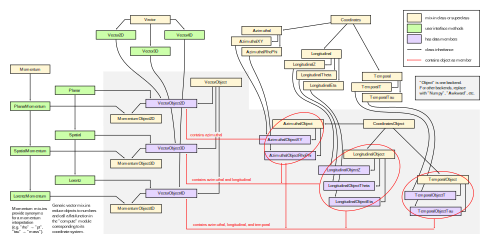

In [5]:
from IPython.display import SVG, display

display(SVG("./inheritance.svg"))

# better here - https://github.com/scikit-hep/vector/blob/main/docs/api/inheritance.svg

In [6]:
vec2D = vector.obj(x=1., y=2.)
vec3D = vector.obj(x=1., y=2., z=3.)
vec4D = vector.obj(x=1., y=2., z=3. , tau=4.)

type(vec2D), type(vec3D), type(vec4D)

(vector.backends.object.VectorObject2D,
 vector.backends.object.VectorObject3D,
 vector.backends.object.VectorObject4D)

- All vector classes are the subclass of `Vector`.
- Every backend has its own `Vector<Backend><X>D` classes, which is a subclass of `Vector<Backend>`.
- All `2D` vector classes are a subclass of `Vector2D`, and so on ...

In [7]:
isinstance(vec2D, (vector.Vector, vector.Vector2D, vector.VectorObject, vector.VectorObject2D))

True

Additionally, vector classes are also a subclass of `Planar`, `Spatial`, and/or `Temporal`.

In [8]:
isinstance(vec3D, vector.Planar), isinstance(vec2D, vector.Spatial), isinstance(vec4D, vector.Lorentz)

(True, False, True)

Similarly for `MomentumVectors` -

In [9]:
vecm = vector.obj(px=1., py=2., pz=3., E=4.)
isinstance(
    vecm, 
    (
        vector.Momentum,
        vector.MomentumObject2D,
        vector.Vector,
        vector.Vector2D,
        vector.VectorObject2D,
        vector.Planar,
        vector.Spatial,
        vector.Temporal,
    )
)

True

And `Azimuthal`, `Longitudinal`, `Temporal` classes -

In [10]:
vec4D = vector.obj(x=1., y=2., z=3., tau=4.)

assert isinstance(
    vec4D.azimuthal,
    (
        vector.Azimuthal,
        vector.AzimuthalXY,
        vector.backends.object.AzimuthalObject,
        vector.backends.object.AzimuthalObjectXY,
    )
)

assert isinstance(
    vec4D.longitudinal,
    (
        vector.Longitudinal,
        vector.LongitudinalZ,
        vector.backends.object.LongitudinalObject,
        vector.backends.object.LongitudinalObjectZ,
    )
)

assert isinstance(
    vec4D.temporal,
    (
        vector.Temporal,
        vector.TemporalTau,
        vector.backends.object.TemporalObject,
        vector.backends.object.TemporalObjectTau,
    )
)

### Methods and properties

`Vector` comes loaded with numerous methods and properties which are flowed down using inheritance or are directly defined in the child class.

- `x`, `y`, `z`, `t`, `rho`, `phi`, ...

- `add`, `subtract`, `cross`, `dot`, `equal`, ...

- `to_xyz`, `to_xyzt`, `to_rhophithetatau`, ..., `to_Vector2D` `to_Vector3D`, ...

- `azimuthal`, `longitudinal`, `temporal`

- `costheta`, `cottheta`

- `deltaangle`, `deltaphi`, `deltaeta`, `deltaR`, `deltaR2`

-  ...

In [11]:
vec3D = vector.obj(x=1., y=3., z=3.)

A great way to go through these methods and properties is to press TAB!

An even greater way is to go through the documentation!

A complete list of vector properties and methods is available here - https://github.com/scikit-hep/vector#vector-properties 

In [ ]:
vec3D.

Let's say we want to gather the azimuthal coordinates. We will start by obtaining the `Azimuthal` object -

In [12]:
vec3D.azimuthal

AzimuthalObjectXY(x=1.0, y=3.0)

Next, let's quickly go through the docs of `AzimuthalObjectXY.

In [13]:
?vector.backends.object.AzimuthalObjectXY

Init signature:
vector.backends.object.AzimuthalObjectXY(
    x: ForwardRef('float'),
    y: ForwardRef('float'),
)
Docstring:     
Class for the ``x`` and ``y`` (azimuthal) coordinates of Object backend.
Use the ``elements`` property to retrieve the coordinates.
File:           c:\users\saransh\saransh_softwares\python_3.9\lib\site-packages\vector\backends\object.py
Type:           type
Subclasses:     


Now we know that we can use the `elements` property to access the coordinates!

In [14]:
vec3D.azimuthal.elements

(1.0, 3.0)

### Allowed coordinate combinations

The allowed keyword arguments for 2D vectors are:

- `x` and `y` for Cartesian azimuthal coordinates,
- `px` and `py` for momentum,
- `rho` and `phi` for polar azimuthal coordinates,
- `pt` and `phi` for momentum.

For 3D vectors, you need the above and:

- `z` for the Cartesian longitudinal coordinate,
- `pz` for momentum,
- `theta` for the spherical polar angle (from $0$ to $\pi$, inclusive),
- `eta` for pseudorapidity, which is a kind of spherical polar angle.

For 4D vectors, you need the above and:

- `t` for the Cartesian temporal coordinate,
- `E` or `energy` to get four-momentum,
- `tau` for the "proper time" (temporal coordinate in the vector's rest coordinate system),
- `M` or `mass` to get four-momentum.

All possible combinations (replace with momentum coordinates for momentum vectors)

- (2D) `x` `y`
- (2D) `rho` `phi`
- (3D) `x` `y` `z`
- (3D) `x` `y` `theta`
- (3D) `x` `y` `eta`
- (3D) `rho` `phi` `z`
- (3D) `rho` `phi` `theta`
- (3D) `rho` `phi` `eta`
- (4D) `x` `y` `z` `t`
- (4D) `x` `y` `z` `tau`
- (4D) `x` `y` `theta` `t`
- (4D) `x` `y` `theta` `tau`
- (4D) `x` `y` `eta` `t`
- (4D) `x` `y` `eta` `tau`
- (4D) `rho` `phi` `z` `t`
- (4D) `rho` `phi` `z` `tau`
- (4D) `rho` `phi` `theta` `t`
- (4D) `rho` `phi` `theta` `tau`
- (4D) `rho` `phi` `eta` `t`
- (4D) `rho` `phi` `eta` `tau`

## NumPy vectors

`Vector` provides `vector.VectorNumpyXD` classes and `vector.array`constructor to construct `NumPy` vectors. The `VectorNumpyXD` classes are subclasses of `NumPy` array; hence they behave a lot like a structured `NumPy` array.

Currently, vector only accepts structured `NumPy` arrays to construct vectors. The `NumPy` dtype of a structured array is `object`; hence, these arrays are not as fast as the conventional `NumPy` arrays. 

In [15]:
vector.array(
    [(1., 2.), (3., 4.), (5., 6.), (7., 8.), (9., 10.)],
    dtype=[("x", float), ("y", float)],
)

VectorNumpy2D([(1.,  2.), (3.,  4.), (5.,  6.), (7.,  8.), (9., 10.)],
              dtype=[('x', '<f8'), ('y', '<f8')])

In [16]:
vector.VectorNumpy2D(
    [(1., 2.), (3., 4.), (5., 6.), (7., 8.), (9., 10.)],
    dtype=[("x", float), ("y", float)],
)

VectorNumpy2D([(1.,  2.), (3.,  4.), (5.,  6.), (7.,  8.), (9., 10.)],
              dtype=[('x', '<f8'), ('y', '<f8')])

One can also pass `pandas` like columns to the `vector.array` constructors.

In [17]:
vector.array({"x": [1., 2., 3., 4., 5.], "y": [2., 3., 4., 5., 6.]})

VectorNumpy2D([(1., 2.), (2., 3.), (3., 4.), (4., 5.), (5., 6.)],
              dtype=[('x', '<f8'), ('y', '<f8')])

Existing NumPy arrays can be viewed as arrays of vectors, but it needs to be a structured array with recognized field names.

In [18]:
import numpy as np

vec = np.arange(0, 24, 0.5).view(
    [
        ("x", float),
        ("y", float),
        ("z", float),
        ("t", float),
    ]
).view(
    vector.VectorNumpy4D
)

vec

VectorNumpy4D([( 0.,  0.5,  1.,  1.5), ( 2.,  2.5,  3.,  3.5),
               ( 4.,  4.5,  5.,  5.5), ( 6.,  6.5,  7.,  7.5),
               ( 8.,  8.5,  9.,  9.5), (10., 10.5, 11., 11.5),
               (12., 12.5, 13., 13.5), (14., 14.5, 15., 15.5),
               (16., 16.5, 17., 17.5), (18., 18.5, 19., 19.5),
               (20., 20.5, 21., 21.5), (22., 22.5, 23., 23.5)],
              dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('t', '<f8')])

Since VectorNumpy2D, VectorNumpy3D, VectorNumpy4D, and their momentum equivalents are NumPy array subclasses, all of the normal NumPy methods and functions work on them.

In [19]:
vec.reshape(1, 3, 4)

VectorNumpy4D([[[( 0.,  0.5,  1.,  1.5), ( 2.,  2.5,  3.,  3.5),
                 ( 4.,  4.5,  5.,  5.5), ( 6.,  6.5,  7.,  7.5)],
                [( 8.,  8.5,  9.,  9.5), (10., 10.5, 11., 11.5),
                 (12., 12.5, 13., 13.5), (14., 14.5, 15., 15.5)],
                [(16., 16.5, 17., 17.5), (18., 18.5, 19., 19.5),
                 (20., 20.5, 21., 21.5), (22., 22.5, 23., 23.5)]]],
              dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('t', '<f8')])

Similarly, momentum vectors can be created by either passing in momentum coordinates or by using the `MomentumNumpyXD` classes.

In [20]:
vector.array({"px": [1, 2, 3, 4], "py": [1.1, 2.2, 3.3, 4.4], "pz": [0.1, 0.2, 0.3, 0.4]})

MomentumNumpy3D([(1., 1.1, 0.1), (2., 2.2, 0.2), (3., 3.3, 0.3), (4., 4.4, 0.4)],
                dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [21]:
vector.MomentumNumpy2D(
    [(1., 2.), (3., 4.), (5., 6.), (7., 8.), (9., 10.)],
    dtype=[("px", float), ("py", float)],
)

MomentumNumpy2D([(1.,  2.), (3.,  4.), (5.,  6.), (7.,  8.), (9., 10.)],
                dtype=[('x', '<f8'), ('y', '<f8')])

## Awkward vectors

Similar to the `NumPy` backend, `Vector` provides `vector.VectorArrayXD` classes and `vector.Array`constructor to construct `Awkward` vectors. The `VectorArayXD` classes are subclasses of `Awkward` array.

Additionally, `vector` also provides the `vector.zip` constructor which acts similar to `awkward.zip`.

In [22]:
vec = vector.awk(
    [
        [{"x": 1, "y": 1.1, "z": 0.1}, {"x": 2, "y": 2.2, "z": 0.2}],
        [],
        [{"x": 3, "y": 3.3, "z": 0.3}],
    ]
)

vec

<VectorArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Vector3D["...'>

In [23]:
vec = vector.zip({"x": [1, 2 ,3], "y": [1, 2, 3], "z": [1, 2, 3]})

vec

<VectorArray3D [{x: 1, y: 1, z: 1}, ... y: 3, z: 3}] type='3 * Vector3D["x": int...'>

Similar to `NumPy` and `Object` vectors, `Awkward` vectors can also access the vector properties.

Note: An array of vectors returns an array of coordinates, and an awkward vector returns an awkward array of coordinates.

In [24]:
vec.azimuthal

AzimuthalAwkwardXY(<Array [1, 2, 3] type='3 * int64'>, <Array [1, 2, 3] type='3 * int64'>)

In [25]:
vec.x

<Array [1, 2, 3] type='3 * int64'>

If you want any records named `Vector2D`, `Vector3D`, `Vector4D`, `Momentum2D`, `Momentum3D`, or `Momentum4D` to be interpreted as vectors, register the behaviors globally.

In [26]:
import awkward as ak

vector.register_awkward()

ak.Array(
    [
        [{"x": 1, "y": 1.1, "z": 0.1}, {"x": 2, "y": 2.2, "z": 0.2}],
        [],
        [{"x": 3, "y": 3.3, "z": 0.3}],
    ],
    with_name="Vector3D",
)

<VectorArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Vector3D["...'>

Momentum vectors work in the same way!

In [27]:
vector.awk(
    [
        [{"px": 1, "py": 1.1, "pz": 0.1}, {"px": 2, "py": 2.2, "pz": 0.2}],
        [],
        [{"px": 3, "py": 3.3, "pz": 0.3}],
    ]
)

<MomentumArray3D [[{x: 1, y: 1.1, z: 0.1, ... z: 0.3}]] type='3 * var * Momentum...'>

## Compiling vectors with Numba

Vector also comes loaded with `Numba-X` backends. `VectorObject`s and `VectorArray`s are currently compatible with `numba`, and `VectorNumpy` will be supported in the near future.

In [28]:
import numba as nb


@nb.njit
def compute_mass(v1, v2):
    return (v1 + v2).mass


compute_mass(vector.obj(px=1, py=2, pz=3, E=4), vector.obj(px=-1, py=-2, pz=-3, E=4))

8.0

When the two `MomentumObject4D` objects are passed as arguments, Numba recognizes them and replaces the Python objects with low-level structs. When it compiles the function, it recognizes `+` as the 4D `add` function and recognizes `.mass` as the `tau` component of the result.

Although this demonstrates that Numba can manipulate vector objects, there is no performance advantage (and a likely disadvantage) to compiling a calculation on just a few vectors. The advantage comes when many vectors are involved, in arrays.

In [29]:
coords = [
    [
        dict(
            {x: np.random.normal(0, 1) for x in ("px", "py", "pz")},
            E=np.random.normal(10, 1),
        ) for inner in range(np.random.poisson(1.5))
    ] for outer in range(50)
]

len(coords), coords[1]

(50,
 [{'px': 0.6501824294426782,
   'py': -0.6763097011423066,
   'pz': -0.10716060951861181,
   'E': 10.92861653343253}])

In [30]:
array = vector.awk(coords)

In [31]:
array, array.fields, array.type

(<MomentumArray4D [[{x: -0.504, y: -0.543, ... [], []] type='50 * var * Momentum4...'>,
 ['x', 'y', 'z', 't'],
 50 * var * Momentum4D["x": float64, "y": float64, "z": float64, "t": float64])

In [32]:
@nb.njit
def compute_masses(array):
    out = np.empty(len(array), np.float64)
    for i, event in enumerate(array):
        total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
        for vec in event:
            total = total + vec
        out[i] = total.mass
    return out


compute_masses(array)

array([16.16043497, 10.88774742, 10.11909472,  0.        ,  0.        ,
       10.31790599, 10.05422508,  0.        ,  0.        ,  0.        ,
        0.        , 19.39307991, 11.05160406,  8.67221218,  0.        ,
       18.35532653,  0.        ,  8.65994383,  0.        , 19.544993  ,
       19.78412696,  0.        ,  0.        , 21.59229741,  9.87505309,
       20.21759048,  7.82107001,  9.11730401,  0.        , 32.34473786,
       10.10019886,  0.        , 19.50920867,  0.        ,  0.        ,
       22.42470467,  0.        , 19.99439773, 38.99501039, 21.81337545,
       11.39558804, 31.2216409 ,  0.        ,  0.        , 35.87434787,
       10.06254703, 17.35314601, 28.31359567,  0.        ,  0.        ])

## Uproot, Awkward, and Vector

Let us look at how vector integrates with the rest of the HEP ecosystem! We'll start by reading a root file using `uproot`, look at its content using `awkward`, and perform some data analysis using `vector`!

Let's read a data file from `scikit-hep-testdata` -

In [33]:
import skhep_testdata
import uproot

data = uproot.open(skhep_testdata.data_path("uproot-HZZ.root"))

Looking at the keys of the retrieved data -

In [34]:
data.keys()

['events;1']

We can now extract the `TTree` using the 'Events' key -

In [35]:
tree = data['events']

tree

<TTree 'events' (51 branches) at 0x02115c1518b0>

Now we can extract the actual data in the form of `awkward` arrays.

`Awkward` arrays are jagged arrays which are required to manipulate HEP data. `Awkward` smoothly integrates with other HEP packages, like `uproot` and `vector` which we will be seeing ahead. Additionally, `awkward` is fast; hence `Awkward` is to jagged arrays the same way `NumPy` is to regular arrays!

"Arrays are dynamically typed, but operations on them are compiled and fast. Their behavior coincides with NumPy when array dimensions are regular and generalizes when they're not."

In [36]:
branches = tree.arrays()

branches  # awkward array

<Array [{NJet: 0, ... EventWeight: 0.00876}] type='2421 * {"NJet": int32, "Jet_P...'>

As the data is now present in the form of `awkward` arrays, we can use the properties and methods provided by `awkward`. For instance, using the `fields` property to extract the fields - 

In [37]:
branches.fields

['NJet',
 'Jet_Px',
 'Jet_Py',
 'Jet_Pz',
 'Jet_E',
 'Jet_btag',
 'Jet_ID',
 'NMuon',
 'Muon_Px',
 'Muon_Py',
 'Muon_Pz',
 'Muon_E',
 'Muon_Charge',
 'Muon_Iso',
 'NElectron',
 'Electron_Px',
 'Electron_Py',
 'Electron_Pz',
 'Electron_E',
 'Electron_Charge',
 'Electron_Iso',
 'NPhoton',
 'Photon_Px',
 'Photon_Py',
 'Photon_Pz',
 'Photon_E',
 'Photon_Iso',
 'MET_px',
 'MET_py',
 'MChadronicBottom_px',
 'MChadronicBottom_py',
 'MChadronicBottom_pz',
 'MCleptonicBottom_px',
 'MCleptonicBottom_py',
 'MCleptonicBottom_pz',
 'MChadronicWDecayQuark_px',
 'MChadronicWDecayQuark_py',
 'MChadronicWDecayQuark_pz',
 'MChadronicWDecayQuarkBar_px',
 'MChadronicWDecayQuarkBar_py',
 'MChadronicWDecayQuarkBar_pz',
 'MClepton_px',
 'MClepton_py',
 'MClepton_pz',
 'MCleptonPDGid',
 'MCneutrino_px',
 'MCneutrino_py',
 'MCneutrino_pz',
 'NPrimaryVertices',
 'triggerIsoMu24',
 'EventWeight']

Every field corresponds to an `awkward` array too -

In [38]:
branches.Muon_Px

<Array [[-52.9, 37.7], ... 1.14], [23.9]] type='2421 * var * float32'>

Let's construct a vector using the "Muon" fields. Again, `vector` provides the `vector.zip` constructor for this task, and this constructor behaves similar to the `awkward.zip` constructor!

In [39]:
muons = vector.zip(
    {
        'px': branches['Muon_Px'],
        'py': branches['Muon_Py'],
        'pz': branches['Muon_Pz'],
        'E': branches['Muon_E']
    }
)

We now have a `MomentumArray4D` vector!

Remember, `VectorArray` classes inherit `awkward.Array`, which means we can use `awkward.Array`'s properties on it. Checking the type and fields -

In [40]:
muons

<MomentumArray4D [[{x: -52.9, y: -11.7, ... t: 69.6}]] type='2421 * var * Moment...'>

In [41]:
muons.type

2421 * var * Momentum4D["x": float32, "y": float32, "z": float32, "t": float32]

In [42]:
muons.fields

['x', 'y', 'z', 't']

`2421 * var * Momentum4D` here shows that we have `2421` lists of `Momentum4D` vectors with each list having a variable length.

We can also use the methods and properties (discussed above) offered by vector. Let's say we want the `azimuthal` coordinates of the created vector -

In [43]:
muons.azimuthal

AzimuthalAwkwardXY(<Array [[-52.9, 37.7], ... 1.14], [23.9]] type='2421 * var * float32'>, <Array [[-11.7, 0.693], ... 63.6], [-35.7]] type='2421 * var * float32'>)

In [44]:
muons.azimuthal.elements

(<Array [[-52.9, 37.7], ... 1.14], [23.9]] type='2421 * var * float32'>,
 <Array [[-11.7, 0.693], ... 63.6], [-35.7]] type='2421 * var * float32'>)

Similarly for other coordinate types -

Similarly, we can use vector methods on this `MomentumArray`. For instance, let's say we want to convert this vector's coordinates to `rho`, `phi`, **`theta`**, and **`tau`**. Just to be a 100% sure, let's also check the fields -

In [45]:
muons.to_rhophithetatau()

<MomentumArray4D [[{rho: 54.2, ... tau: 0.106}]] type='2421 * var * Momentum4D["...'>

In [46]:
muons.to_rhophithetatau().fields

['rho', 'phi', 'theta', 'tau']

We can also use other such methods, for example, `to_Vector2D` converts N dimensional vector to a 2D vector. Again, we can check the fields -

In [47]:
muons.to_Vector2D()

<MomentumArray2D [[{x: -52.9, y: -11.7, ... y: -35.7}]] type='2421 * var * Momen...'>

In [48]:
muons.to_Vector2D().fields

['x', 'y']

We can also slice these lists using the regular `Python` syntax -

In [49]:
muons[1:100].type

99 * var * Momentum4D["x": float32, "y": float32, "z": float32, "t": float32]

Remember how these lists are of variable length (indicated by `* var`). Let's verify this quickly -

In [50]:
len(muons[1]), len(muons[2])

(1, 2)

We could have also checked this using `awkward`'s `type` -

In [51]:
muons[1].type, muons[2].type

(1 * Momentum4D["x": float32, "y": float32, "z": float32, "t": float32],
 2 * Momentum4D["x": float32, "y": float32, "z": float32, "t": float32])

And as usual, these lists are also iterable -

In [52]:
muons[1][0]

<MomentumRecord4D ... y: -24.4, z: 20.2, t: 31.7} type='Momentum4D["x": float32,...'>

Note: the first list had only 1 element; hence, an index of `>0` should throw an error -

In [53]:
muons[1][1]

ValueError: in RecordArray attempting to get 1, index out of range

(https://github.com/scikit-hep/awkward-1.0/blob/1.9.0/src/libawkward/array/RecordArray.cpp#L792)

Let us create a mask which will select all the events with 2 muons -

In [54]:
mask = ak.num(muons) == 2

ak.num?

In [55]:
?ak.num

Signature: ak.num(array, axis=1, highlevel=True, behavior=None)
Docstring:
Args:
    array: Data containing nested lists to count.
    axis (int): The dimension at which this operation is applied. The
        outermost dimension is `0`, followed by `1`, etc., and negative
        values count backward from the innermost: `-1` is the innermost
        dimension, `-2` is the next level up, etc.
    highlevel (bool): If True, return an #ak.Array; otherwise, return
        a low-level #ak.layout.Content subclass.
    behavior (None or dict): Custom #ak.behavior for the output array, if
        high-level.

Returns an array of integers specifying the number of elements at a
particular level.

For instance, given the following doubly nested `array`,

    ak.Array([[
               [1.1, 2.2, 3.3],
               [],
               [4.4, 5.5],
               [6.6]
              ],
              [],
              [
               [7.7],
               [8.8, 9.9]]
              ])

The number o

We can now obtain a momentum vector of these 2 muon events -

In [56]:
two_muons = muons[mask]

two_muons

<MomentumArray4D [[{x: -52.9, y: -11.7, ... t: 116}]] type='1371 * var * Momentu...'>

In [57]:
muon1 = two_muons[:, 0]
muon2 = two_muons[:, 1]

muon1, muon2

(<MomentumArray4D [{x: -52.9, y: -11.7, ... t: 157}] type='1371 * Momentum4D["x":...'>,
 <MomentumArray4D [{x: 37.7, y: 0.693, ... t: 116}] type='1371 * Momentum4D["x": ...'>)

Using `deltaR` from `vector` -

In [58]:
dR = muon1.deltaR(muon2)

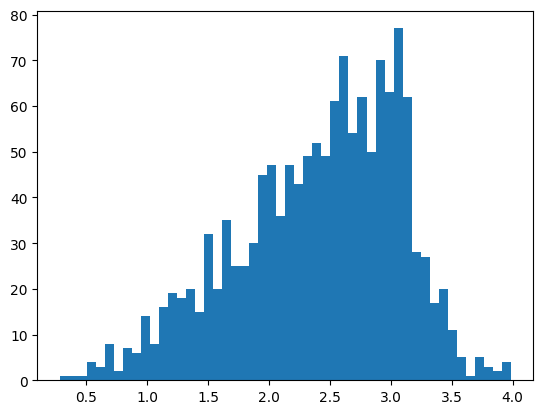

In [59]:
import matplotlib.pyplot as plt

plt.hist(dR, bins=50)
plt.show()

## Recent developments

Vector [`v0.9.0`](https://github.com/scikit-hep/vector/releases/tag/v0.9.0) is out!
- Features: improved reprs, deltaRapidityPhi, backends are public now, …
- Documentation: major documentation overhaul, doctests, CITATION.cff, …
- Bug fixes: type checks, fix nan_to_num, …
- Maintenance: hatchling backend, support awkward._v2 in tests, build and test on Python 3.10 and 3.11-dev, …

More about `v0.9.0` here - https://vector.readthedocs.io/en/latest/changelog.html#version-0-9 

---

Vector [`v0.10.0`](https://github.com/scikit-hep/vector/releases/tag/v0.10.0) is out too!
- Removed support for Python 3.6

More about `v0.10.0` here - https://vector.readthedocs.io/en/latest/changelog.html#version-0-10 

## Near future development plans

- Better constructors (under work)
- A benchmarking suite
- Benchmarks against Root
- A complete `awkward` `v2` support (scheduled for December)
- NumPy-Numba backend
- Other potential backends - CuPy, TensorFlow, Torch, JAX...

Vector was scheduled to have a major release (`v1.0.0`) before `PyHEP 2022`, but that was unfortunately delayed. A major release can be expected in October, which would primarily be introducing new constructors.

Open for user feedback and discussions!

## Stuck somewhere? Reach out!

- If something is not working the way it should, or if you want to request a new feature, create a [new issue](https://github.com/scikit-hep/vector/issues) on GitHub.
- To discuss something related to vector, use the [discussions](https://github.com/scikit-hep/vector/discussions/) tab on GitHub or vector’s gitter ([Scikit-HEP/vector](https://gitter.im/Scikit-HEP/vector)) chat room.
- Have a look at vector's [changelog](https://vector.readthedocs.io/en/latest/#changes-in-vector-s-api) to stay up-to-date!